## Preliminary Exploratory Data Analysis

Dataset can be found here https://www.kaggle.com/datasets/nelakurthisudheer/dataset-for-predicting-watering-the-plants by Nelakurthi Sudheer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [2]:
df = pd.read_csv('soil_data.csv')
df.head()

,Soil Moisture,Temperature,Soil Humidity,Time,Air temperature (C),Wind speed (Km/h),Air humidity (%),Wind gust (Km/h),Pressure (KPa),ph,rainfall,N,P,K,Status
0,54,22,70,21,19.52,2.13,55.04,6.30,101.50,6.502985,202.935536,90.0,42.0,43.0,ON
1,12,20,40,104,19.49,2.01,55.17,10.46,101.50,7.038096,226.655537,85.0,58.0,41.0,OFF
2,34,26,35,62,19.47,1.90,55.30,14.63,101.51,7.840207,263.964248,60.0,55.0,44.0,ON
3,7,44,44,93,19.54,2.28,54.20,16.08,101.51,6.980401,242.864034,74.0,35.0,40.0,OFF
4,50,38,23,92,19.61,2.66,53.09,17.52,101.51,7.628473,262.717340,78.0,42.0,42.0,OFF


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Soil Moisture        100000 non-null  int64  
 1   Temperature          100000 non-null  int64  
 2   Soil Humidity        100000 non-null  int64  
 3   Time                 100000 non-null  int64  
 4   Air temperature (C)  23995 non-null   float64
 5   Wind speed (Km/h)    23995 non-null   float64
 6   Air humidity (%)     23995 non-null   float64
 7   Wind gust (Km/h)     23995 non-null   float64
 8   Pressure (KPa)       23995 non-null   float64
 9   ph                   2200 non-null    float64
 10  rainfall             2200 non-null    float64
 11  N                    2200 non-null    float64
 12  P                    2200 non-null    float64
 13  K                    2200 non-null    float64
 14  Status               100000 non-null  object 
dtypes: float64(10), in

In [4]:
df.shape

(100000, 15)

In [5]:
print("# of ON records: ", df[df['Status'] == 'ON'].shape[0])
print("# of OFF records: ", df[df['Status'] == 'OFF'].shape[0])

# of ON records:  53650
# of OFF records:  46350


In [6]:
#dropping all the null values of air temp
df = df.dropna(axis=0, subset=['Air temperature (C)'])
df = df.dropna(axis=0, subset=['Wind speed (Km/h)'])
df = df.dropna(axis=0, subset=['Air humidity (%)'])
df = df.dropna(axis=0, subset=['Wind gust (Km/h)'])
df = df.dropna(axis=0, subset=['Pressure (KPa)'])
print("# of ON records: ", df[df['Status'] == 'ON'].shape[0])
print("# of OFF records: ", df[df['Status'] == 'OFF'].shape[0])

# of ON records:  12973
# of OFF records:  11022


note: dataset is still balanced after removing null values from air temp

question: do we still want to keep columns with only 2200 rows? (ph, rainfall, N, P, K)

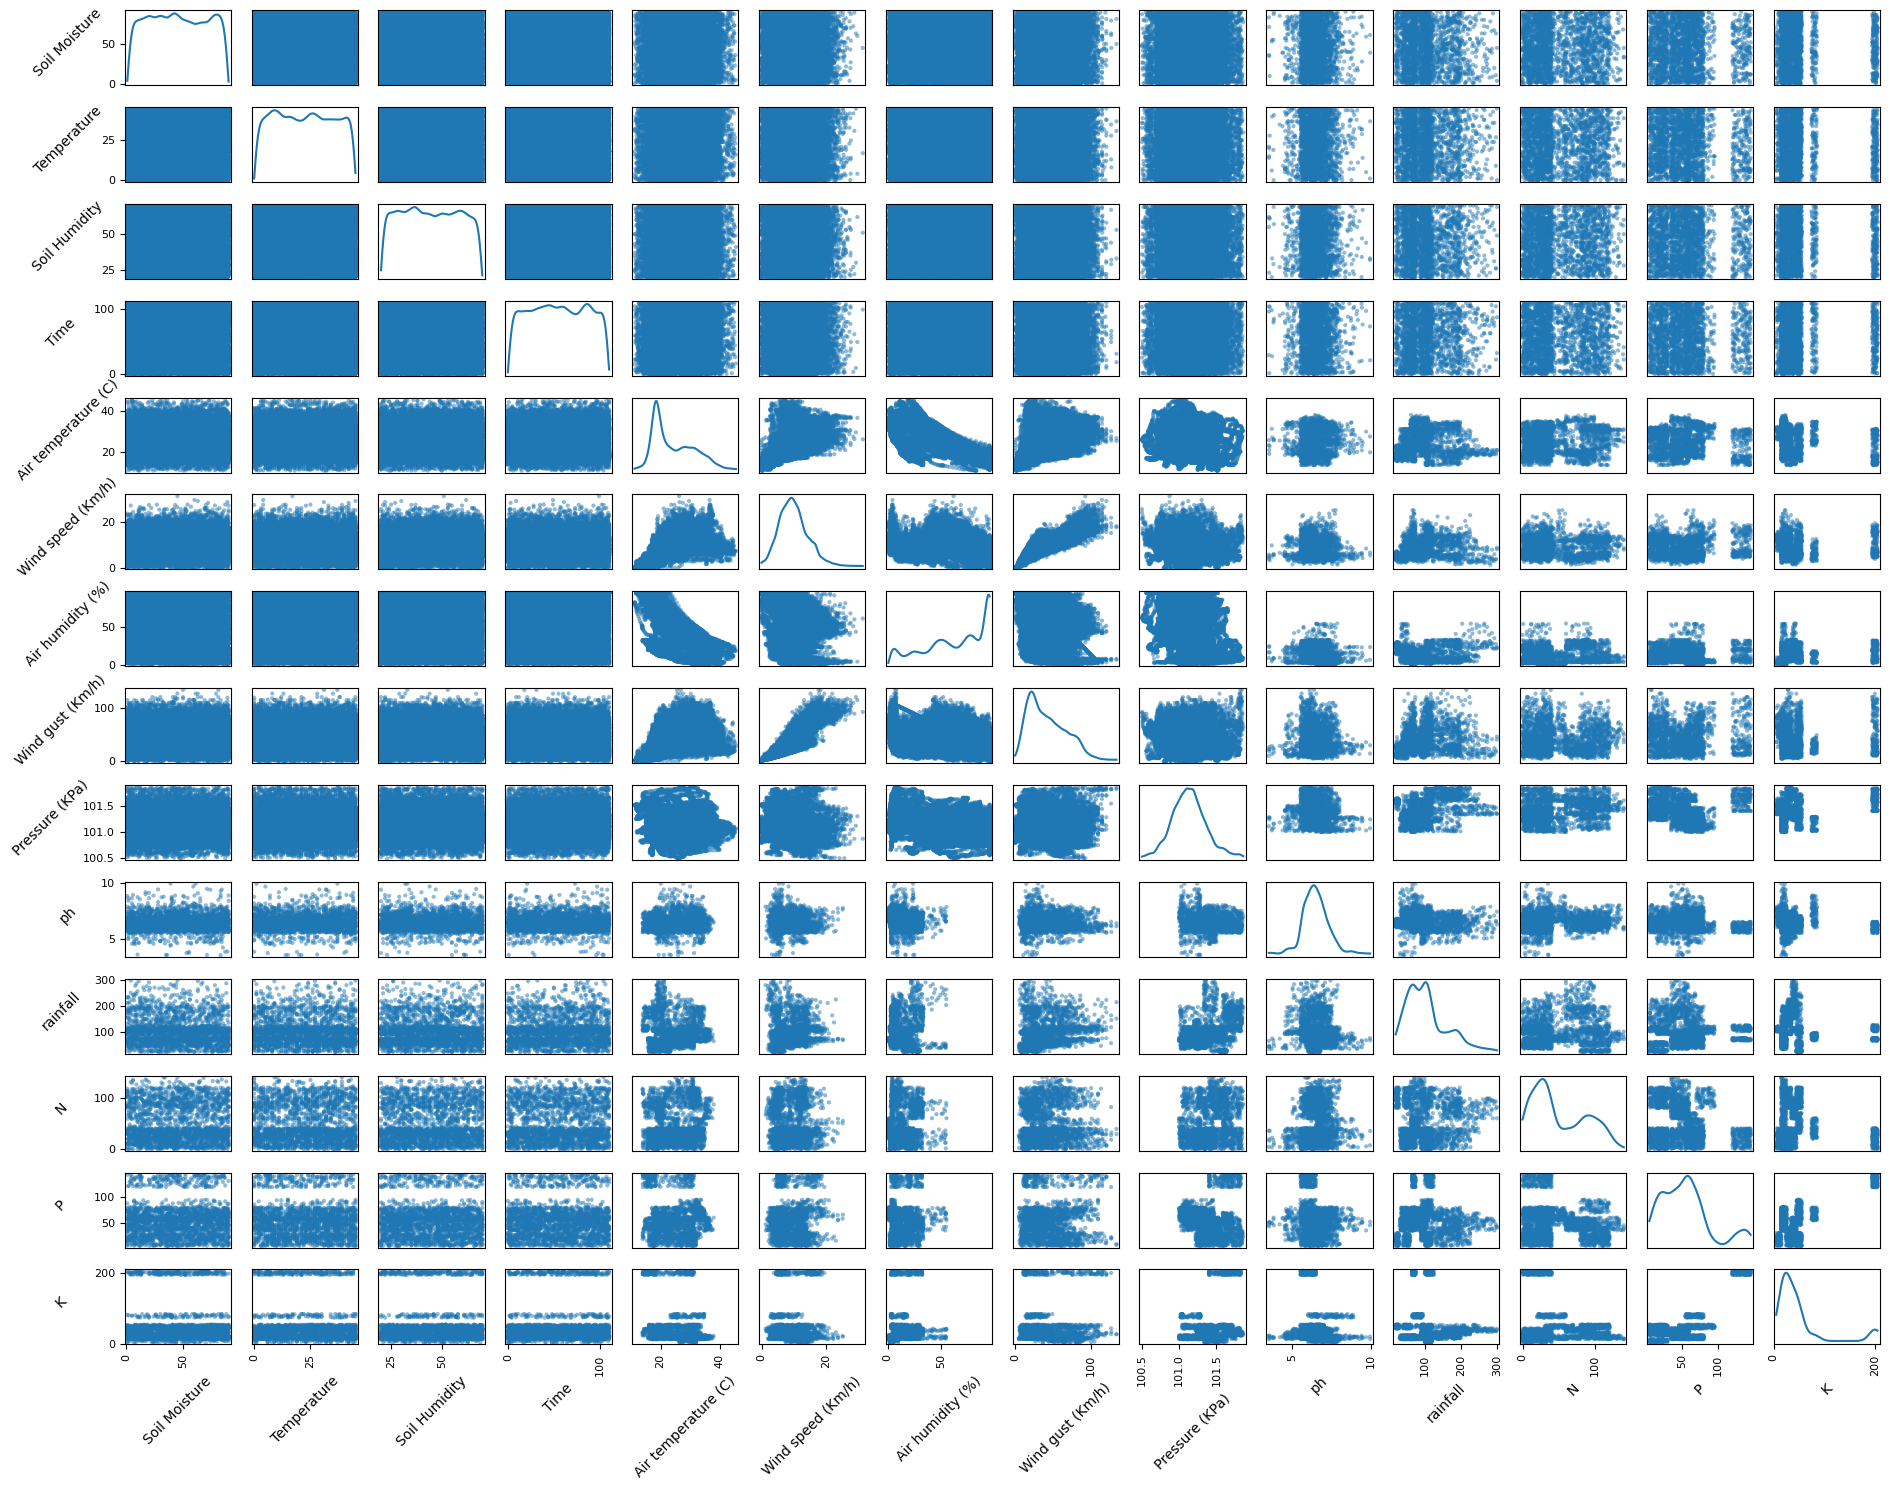

In [7]:
axes = scatter_matrix(df, alpha=0.5, diagonal='kde',figsize=(19, 15)) 

numerical_df = df.select_dtypes(include=[np.number])
# I got an error where it couldn't recognize the "ON" and "OFF" values as numbers, so I had to drop them
corr = numerical_df.corr().to_numpy()

for ax in axes.ravel():
    ax.set_xlabel(ax.get_xlabel(), rotation=45) 
    ax.set_ylabel(ax.get_ylabel(), rotation=45,labelpad=20) 
    
plt.tight_layout()
plt.show()

<Axes: >

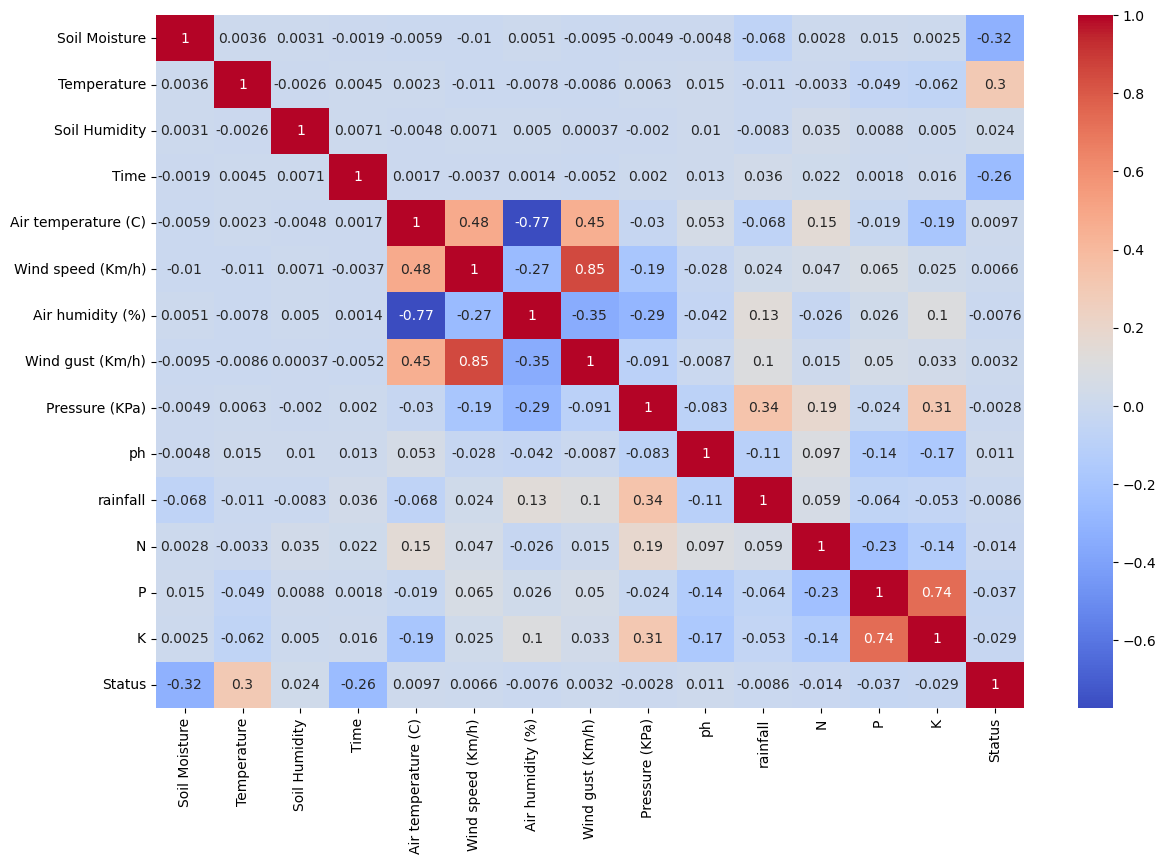

In [8]:
df = pd.read_csv('soil_data.csv')
df['Status']= df['Status'].map({'OFF': 0, 'ON': 1})
corr = df.corr()
plt.figure(figsize=(14,9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Univariate Testing
Univariate testing only considers variables in *isolation*. 


In [9]:
df = pd.read_csv('soil_data.csv')
df = df.dropna(axis=0, subset=['Air temperature (C)'])\
    .drop(['N','P','K','rainfall','ph'], axis = 1) #dropped all columns with fewer than a 23995 records

In [10]:
from sklearn.feature_selection import SelectKBest, chi2

X = df.drop(["Status"], axis = 1)
y = df["Status"]

feature_selector = SelectKBest(chi2, k = "all")
fit = feature_selector.fit(X,y)

p_values = pd.DataFrame(fit.pvalues_)
scores = pd.DataFrame(fit.scores_)
input_variable_names = pd.DataFrame(X.columns)
summary_stats = pd.concat([input_variable_names, p_values, scores], axis = 1)
summary_stats.columns = ["input_variable", "p_value", "chi2_score"]
summary_stats.sort_values(by = "p_value", inplace = True)

p_value_threshold = 0.05 #arbitrarily chosen
score_threshold = 5 #arbitrarily chosen

selected_variables = summary_stats.loc[(summary_stats["chi2_score"] >= score_threshold) &
                                       (summary_stats["p_value"] <= p_value_threshold)]
selected_variables = selected_variables["input_variable"].tolist()
X_new = X[selected_variables]

In [11]:
summary_stats

,input_variable,p_value,chi2_score
0,Soil Moisture,0.000000e+00,37328.725341
1,Temperature,0.000000e+00,17891.049653
3,Time,0.000000e+00,27553.143467
2,Soil Humidity,2.436928e-15,62.675791
6,Air humidity (%),3.779211e-06,21.373694
4,Air temperature (C),3.908095e-02,4.257345
7,Wind gust (Km/h),6.351471e-02,3.443144
5,Wind speed (Km/h),1.616797e-01,1.958446
8,Pressure (KPa),9.925913e-01,0.000086


In [12]:
df["Time"].sort_values().unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110], dtype=int64)

In [13]:
print(f"Number of significant features: {len(selected_variables)}")
selected_variables

Number of significant features: 5


['Soil Moisture', 'Temperature', 'Time', 'Soil Humidity', 'Air humidity (%)']

## Recursive Feature Elimination with Cross-Validation (RFECV)
Iteratively removes features with weak relationships

Optimal number of features: 6


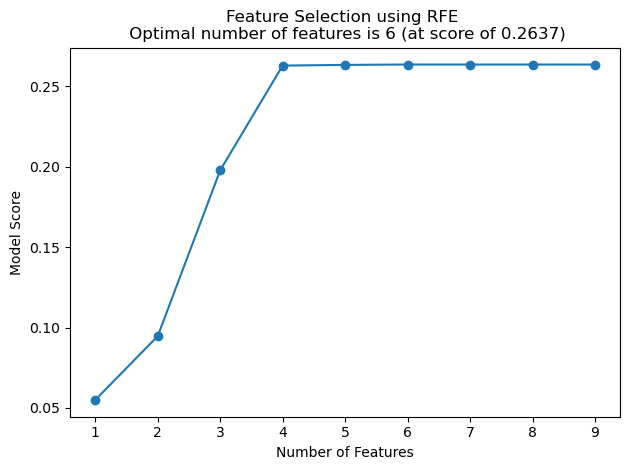

In [14]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

X = df.drop(["Status"], axis=1)
y = df["Status"].map({'OFF': 0, 'ON': 1})

regressor = LinearRegression()
feature_selector = RFECV(regressor)

fit = feature_selector.fit(X, y)

optimal_feature_count = feature_selector.n_features_
print(f"Optimal number of features: {optimal_feature_count}")

X_new = X.loc[:, feature_selector.get_support()]

# Plotting the results
plt.plot(range(1, len(feature_selector.cv_results_['mean_test_score']) + 1),
         feature_selector.cv_results_['mean_test_score'], marker="o")
plt.ylabel("Model Score")
plt.xlabel("Number of Features")
plt.title(f"Feature Selection using RFE \n Optimal number of features is {optimal_feature_count} (at score of {round(max(feature_selector.cv_results_['mean_test_score']), 4)})")
plt.tight_layout()
plt.show()

In [15]:
optimal_features = X.columns[feature_selector.get_support()]

print("Optimal features are:")
print(optimal_features.tolist())


Optimal features are:
['Soil Moisture', 'Temperature', 'Soil Humidity', 'Time', 'Air temperature (C)', 'Pressure (KPa)']


In [16]:
X_new

,Soil Moisture,Temperature,Soil Humidity,Time,Air temperature (C),Pressure (KPa)
0,54,22,70,21,19.52,101.50
1,12,20,40,104,19.49,101.50
2,34,26,35,62,19.47,101.51
3,7,44,44,93,19.54,101.51
4,50,38,23,92,19.61,101.51
...,...,...,...,...,...,...
26296,77,30,62,23,19.46,101.04
26297,33,35,24,63,19.90,101.04
26298,88,2,34,3,20.34,101.04
26299,61,45,60,97,20.70,101.05


In [17]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

X = df.drop(["Status"], axis=1)
y = df["Status"].map({'OFF': 0, 'ON': 1})

classifier = LogisticRegression(max_iter=1000)
feature_selector = RFECV(classifier, step=1, cv=5, scoring='accuracy')  # Use an appropriate scoring metric

fit = feature_selector.fit(X, y)

optimal_feature_count = feature_selector.n_features_
print(f"Optimal number of features: {optimal_feature_count}")

optimal_features_rfecv = X.columns[feature_selector.get_support()]

print("RFECV Optimal features are:")
print(optimal_features_rfecv.tolist())


Optimal number of features: 5
RFECV Optimal features are:
['Soil Moisture', 'Temperature', 'Soil Humidity', 'Time', 'Pressure (KPa)']


In [18]:
# Drop the 'Time' column and create a temporary dataframe
temp_df = df.drop(['Time'], axis=1)

# Redo SelectKBest
X_temp = temp_df.drop(["Status"], axis=1)
y_temp = temp_df["Status"].map({'OFF': 0, 'ON': 1})

feature_selector_kbest = SelectKBest(chi2, k="all")
fit_kbest = feature_selector_kbest.fit(X_temp, y_temp)

p_values_temp = pd.DataFrame(fit_kbest.pvalues_)
scores_temp = pd.DataFrame(fit_kbest.scores_)
input_variable_names_temp = pd.DataFrame(X_temp.columns)
summary_stats_temp = pd.concat([input_variable_names_temp, p_values_temp, scores_temp], axis=1)
summary_stats_temp.columns = ["input_variable", "p_value", "chi2_score"]
summary_stats_temp.sort_values(by="p_value", inplace=True)

selected_variables_kbest = summary_stats_temp.loc[
    (summary_stats_temp["chi2_score"] >= score_threshold) &
    (summary_stats_temp["p_value"] <= p_value_threshold)
]
selected_variables_kbest = selected_variables_kbest["input_variable"].tolist()
X_new_kbest = X_temp[selected_variables_kbest]

# Redo RFECV with Linear Regression
regressor = LinearRegression()
feature_selector_rfecv = RFECV(regressor)

fit_rfecv = feature_selector_rfecv.fit(X_temp, y_temp)

optimal_feature_count_rfecv = feature_selector_rfecv.n_features_
optimal_features_rfecv = X_temp.columns[feature_selector_rfecv.get_support()]

# Redo RFECV with Logistic Regression
classifier = LogisticRegression(max_iter=1000)
feature_selector_rfecv_logistic = RFECV(classifier, step=1, cv=5, scoring='accuracy')

fit_rfecv_logistic = feature_selector_rfecv_logistic.fit(X_temp, y_temp)

optimal_feature_count_rfecv_logistic = feature_selector_rfecv_logistic.n_features_
optimal_features_rfecv_logistic = X_temp.columns[feature_selector_rfecv_logistic.get_support()]

# Output the results
print(f"Optimal number of features with SelectKBest: {len(selected_variables_kbest)}")
print(f"Selected features with SelectKBest: {selected_variables_kbest}")
print(f"Optimal number of features with RFECV (Linear Regression): {optimal_feature_count_rfecv}")
print(f"Selected features with RFECV (Linear Regression): {optimal_features_rfecv.tolist()}")
print(f"Optimal number of features with RFECV (Logistic Regression): {optimal_feature_count_rfecv_logistic}")
print(f"Selected features with RFECV (Logistic Regression): {optimal_features_rfecv_logistic.tolist()}")


Optimal number of features with SelectKBest: 4
Selected features with SelectKBest: ['Soil Moisture', 'Temperature', 'Soil Humidity', 'Air humidity (%)']
Optimal number of features with RFECV (Linear Regression): 6
Selected features with RFECV (Linear Regression): ['Soil Moisture', 'Temperature', 'Soil Humidity', 'Air temperature (C)', 'Wind speed (Km/h)', 'Pressure (KPa)']
Optimal number of features with RFECV (Logistic Regression): 2
Selected features with RFECV (Logistic Regression): ['Soil Moisture', 'Temperature']


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# remove time and status columns
X_selected = df.drop(['Time', 'Status'], axis=1).apply(pd.to_numeric, errors='coerce')

X_selected = X_selected.fillna(X_selected.mean())
X_selected = X_selected.dropna()

# basic function which calculates VIF scores
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# iteratively remove highest vif score with the threshold of 10, if all below 10 then we can stop and return
vif_threshold = 10
while True:
    vif_data = calculate_vif(X_selected)
    max_vif = vif_data['VIF'].max()
    if max_vif > vif_threshold:
        feature_to_remove = vif_data.loc[vif_data['VIF'].idxmax(), 'feature']
        print(f"Removing feature '{feature_to_remove}' with VIF: {max_vif}")
        X_selected = X_selected.drop(columns=[feature_to_remove])
    else:
        break


# return the final scores and set of features to be used in training
print("Final VIF scores:")
print(vif_data)

Removing feature 'Pressure (KPa)' with VIF: 86.24729204529129
Removing feature 'Wind speed (Km/h)' with VIF: 25.9152009726623
Removing feature 'Air temperature (C)' with VIF: 12.033734265142312
Final VIF scores:
            feature       VIF
0     Soil Moisture  3.582071
1       Temperature  3.416768
2     Soil Humidity  6.740066
3  Air humidity (%)  3.943991
4  Wind gust (Km/h)  3.393525


# Training Models

### Logistic

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split

# Define features and target
X = df[['Soil Moisture', 'Temperature', 'Soil Humidity', 'Air humidity (%)', 'Wind gust (Km/h)']]
y = df['Status'].map({'OFF': 0, 'ON': 1})

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hyperparameter tuning for Logistic Regression
param_grid_log = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2', 'l1'],
    'solver': ['liblinear', 'saga']
}
grid_log = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_log, cv=5, scoring='precision')
grid_log.fit(X_train, y_train)
print("Best Parameters for Logistic Regression:", grid_log.best_params_)

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42, C=1, penalty='l2', solver='liblinear')
log_reg.fit(X_train, y_train)

# Training performance
y_train_pred_log = log_reg.predict(X_train)
accuracy_train_log = accuracy_score(y_train, y_train_pred_log)
print("Logistic Regression Training Accuracy:", accuracy_train_log)
print("Training Classification Report:\n", classification_report(y_train, y_train_pred_log))

# Testing performance
y_test_pred_log = log_reg.predict(X_test)
accuracy_test_log = accuracy_score(y_test, y_test_pred_log)
print("Logistic Regression Testing Accuracy:", accuracy_test_log)
print("Testing Classification Report:\n", classification_report(y_test, y_test_pred_log))


Best Parameters for Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Training Accuracy: 0.7023696118123363
Training Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.65      0.67      7729
           1       0.71      0.75      0.73      9067

    accuracy                           0.70     16796
   macro avg       0.70      0.70      0.70     16796
weighted avg       0.70      0.70      0.70     16796

Logistic Regression Testing Accuracy: 0.7009306848173358
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.63      0.66      3293
           1       0.71      0.76      0.73      3906

    accuracy                           0.70      7199
   macro avg       0.70      0.70      0.70      7199
weighted avg       0.70      0.70      0.70      7199



### Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Define features and target
X = df[['Soil Moisture', 'Temperature', 'Soil Humidity', 'Air humidity (%)', 'Wind gust (Km/h)']]
y = df['Status'].map({'OFF': 0, 'ON': 1})

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Training performance
y_train_pred_rf = rf_clf.predict(X_train)
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
print("Random Forest Training Accuracy:", accuracy_train_rf)
print("Training Classification Report:\n", classification_report(y_train, y_train_pred_rf))

# Testing performance
y_test_pred_rf = rf_clf.predict(X_test)
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
print("Random Forest Testing Accuracy:", accuracy_test_rf)
print("Testing Classification Report:\n", classification_report(y_test, y_test_pred_rf))



Random Forest Training Accuracy: 1.0
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7729
           1       1.00      1.00      1.00      9067

    accuracy                           1.00     16796
   macro avg       1.00      1.00      1.00     16796
weighted avg       1.00      1.00      1.00     16796

Random Forest Testing Accuracy: 0.7285734129740241
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.64      0.68      3293
           1       0.73      0.80      0.76      3906

    accuracy                           0.73      7199
   macro avg       0.73      0.72      0.72      7199
weighted avg       0.73      0.73      0.73      7199



In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Define features and target
X = df[['Soil Moisture', 'Temperature', 'Soil Humidity', 'Air humidity (%)', 'Wind gust (Km/h)']]
y = df['Status'].map({'OFF': 0, 'ON': 1})

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],               # Number of trees
    'max_depth': [None, 10, 20, 30],              # Tree depth
    'min_samples_split': [2, 5, 10],              # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],                # Min samples at a leaf node
    'max_features': ['sqrt', 'log2']              # Number of features per split
}

# Set up GridSearchCV with 5-fold cross-validation
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Best parameters found by GridSearch
print("Best Parameters for Random Forest:", grid_rf.best_params_)

# Evaluate the tuned model
best_rf = grid_rf.best_estimator_

# Training performance
y_train_pred_rf = best_rf.predict(X_train)
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
print("Random Forest Training Accuracy:", accuracy_train_rf)
print("Training Classification Report:\n", classification_report(y_train, y_train_pred_rf))

# Testing performance
y_test_pred_rf = best_rf.predict(X_test)
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
print("Random Forest Testing Accuracy:", accuracy_test_rf)
print("Testing Classification Report:\n", classification_report(y_test, y_test_pred_rf))


Best Parameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest Training Accuracy: 0.8017980471540843
Training Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.74      0.77      7729
           1       0.79      0.86      0.82      9067

    accuracy                           0.80     16796
   macro avg       0.80      0.80      0.80     16796
weighted avg       0.80      0.80      0.80     16796

Random Forest Testing Accuracy: 0.7312126684261703
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.65      0.69      3293
           1       0.73      0.80      0.76      3906

    accuracy                           0.73      7199
   macro avg       0.73      0.73      0.73      7199
weighted avg       0.73      0.73      0.73      7199



In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, classification_report

# Define features and target
X = df[['Soil Moisture', 'Temperature', 'Soil Humidity', 'Air humidity (%)', 'Wind gust (Km/h)']]
y = df['Status'].map({'OFF': 0, 'ON': 1})

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Set up GridSearchCV with 5-fold cross-validation, optimizing for precision
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, n_jobs=-1, scoring='precision')
grid_rf.fit(X_train, y_train)

# Best parameters found by GridSearch
print("Best Parameters for Random Forest (Optimized for Precision):", grid_rf.best_params_)

# Evaluate the tuned model
best_rf = grid_rf.best_estimator_

# Training performance
y_train_pred_rf = best_rf.predict(X_train)
precision_train_rf = precision_score(y_train, y_train_pred_rf)
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
print("Random Forest Training Precision:", precision_train_rf)
print("Random Forest Training Accuracy:", accuracy_train_rf)
print("Training Classification Report:\n", classification_report(y_train, y_train_pred_rf))

# Testing performance
y_test_pred_rf = best_rf.predict(X_test)
precision_test_rf = precision_score(y_test, y_test_pred_rf)
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
print("Random Forest Testing Precision:", precision_test_rf)
print("Random Forest Testing Accuracy:", accuracy_test_rf)
print("Testing Classification Report:\n", classification_report(y_test, y_test_pred_rf))


Best Parameters for Random Forest (Optimized for Precision): {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest Training Precision: 0.7937141687141687
Random Forest Training Accuracy: 0.8017980471540843
Training Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.74      0.77      7729
           1       0.79      0.86      0.82      9067

    accuracy                           0.80     16796
   macro avg       0.80      0.80      0.80     16796
weighted avg       0.80      0.80      0.80     16796

Random Forest Testing Precision: 0.7321554770318022
Random Forest Testing Accuracy: 0.7312126684261703
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.65      0.69      3293
           1       0.73      0.80      0.76      3906

    accuracy                           0.73      7199
   macro a

### NB

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split

# Define features and target
X = df[['Soil Moisture', 'Temperature', 'Soil Humidity', 'Air humidity (%)', 'Wind gust (Km/h)']]
y = df['Status'].map({'OFF': 0, 'ON': 1})

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hyperparameter tuning for Naive Bayes
param_grid_nb = {
    'var_smoothing': np.logspace(-11, -7, 5)
}
grid_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=5, scoring='precision')
grid_nb.fit(X_train, y_train)
print("Best Parameters for Naive Bayes:", grid_nb.best_params_)

# Train Naive Bayes
nb_clf = GaussianNB(var_smoothing=1e-11)
nb_clf.fit(X_train, y_train)

# Training performance
y_train_pred_nb = nb_clf.predict(X_train)
accuracy_train_nb = accuracy_score(y_train, y_train_pred_nb)
print("Naive Bayes Training Accuracy:", accuracy_train_nb)
print("Training Classification Report:\n", classification_report(y_train, y_train_pred_nb))

# Testing performance
y_test_pred_nb = nb_clf.predict(X_test)
accuracy_test_nb = accuracy_score(y_test, y_test_pred_nb)
print("Naive Bayes Testing Accuracy:", accuracy_test_nb)
print("Testing Classification Report:\n", classification_report(y_test, y_test_pred_nb))


Best Parameters for Naive Bayes: {'var_smoothing': 1e-11}
Naive Bayes Training Accuracy: 0.7023696118123363
Training Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.64      0.67      7729
           1       0.71      0.75      0.73      9067

    accuracy                           0.70     16796
   macro avg       0.70      0.70      0.70     16796
weighted avg       0.70      0.70      0.70     16796

Naive Bayes Testing Accuracy: 0.7027364911793305
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.63      0.66      3293
           1       0.71      0.76      0.74      3906

    accuracy                           0.70      7199
   macro avg       0.70      0.70      0.70      7199
weighted avg       0.70      0.70      0.70      7199




Evaluating Logistic Regression:



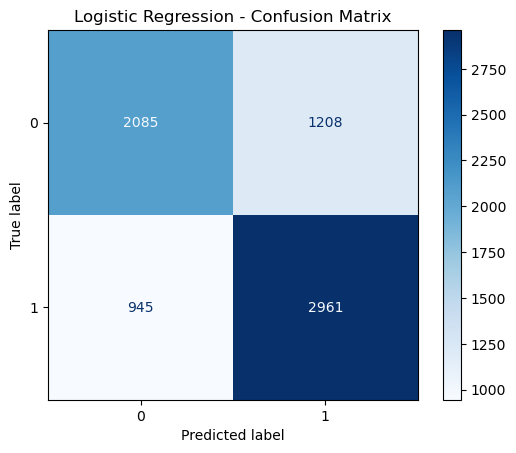

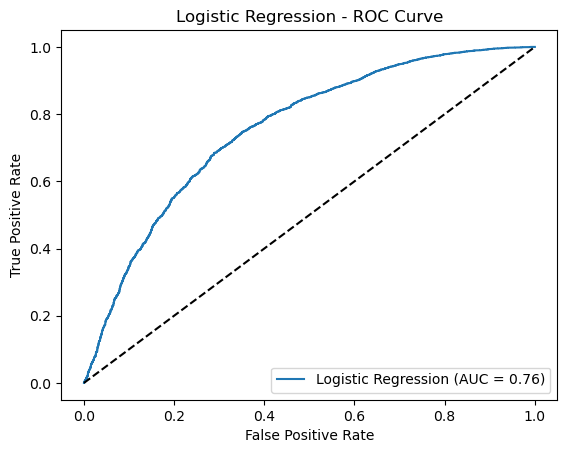

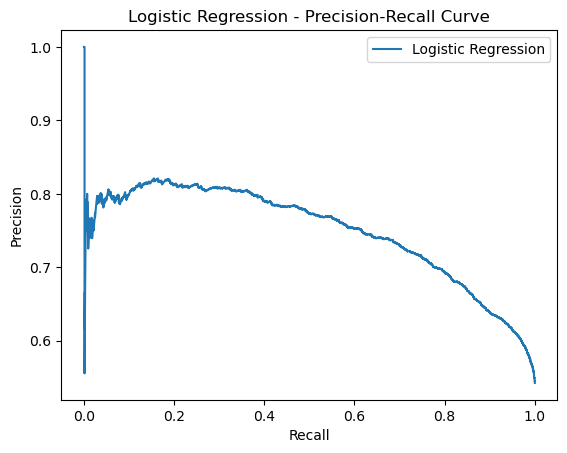


Evaluating Random Forest:



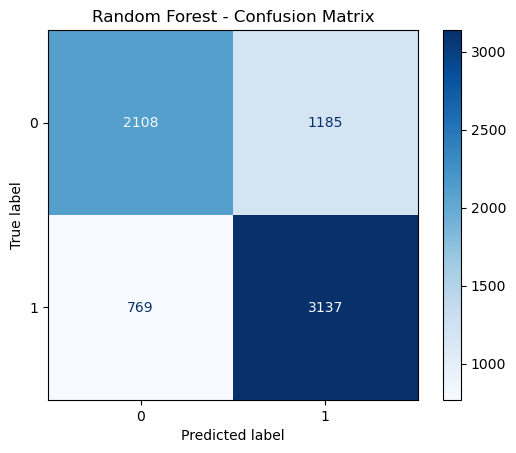

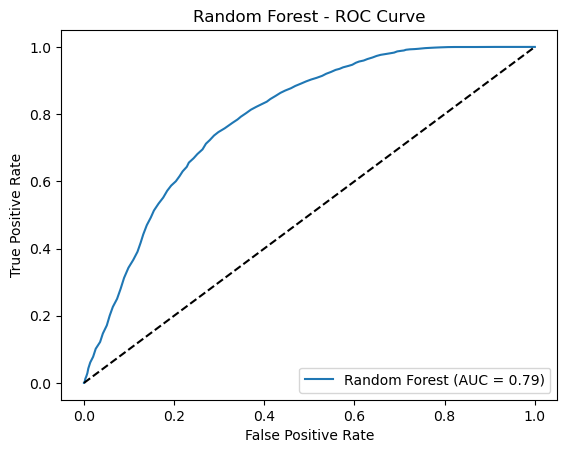

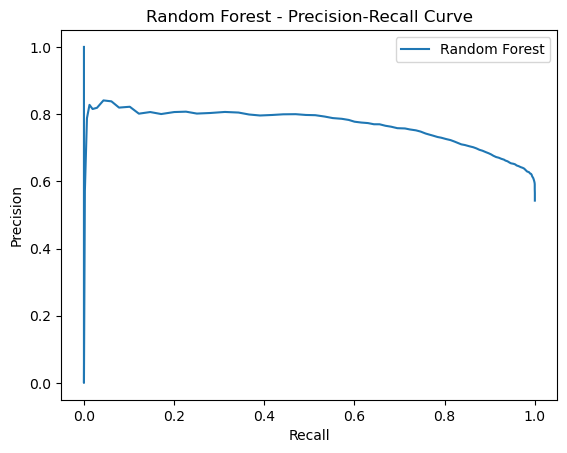


Evaluating Naive Bayes:



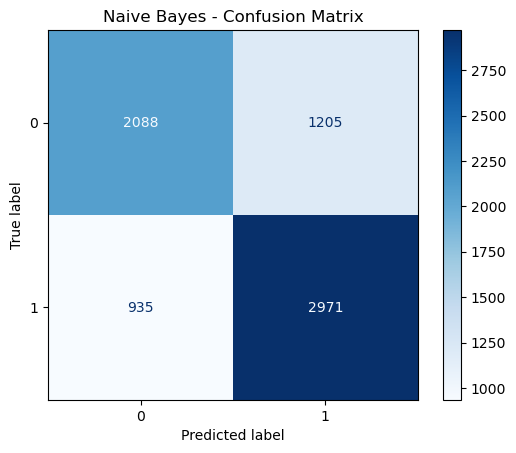

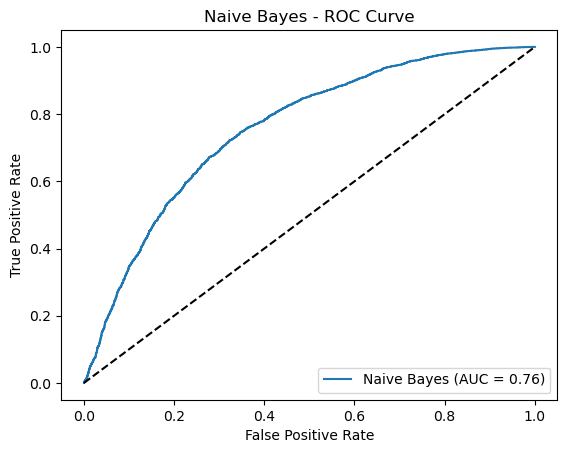

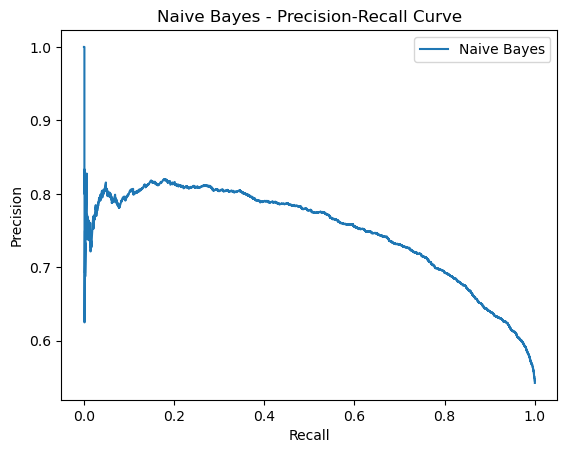

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, model_name):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{model_name} - ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

# Function to plot Precision-Recall curve
def plot_precision_recall_curve(model, X_test, y_test, model_name):
    y_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(recall, precision, label=f"{model_name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{model_name} - Precision-Recall Curve")
    plt.legend(loc="upper right")
    plt.show()

# Evaluate each model
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_clf,
    "Naive Bayes": nb_clf
}

for model_name, model in models.items():
    print(f"\nEvaluating {model_name}:\n")
    plot_confusion_matrix(model, X_test, y_test, model_name)
    plot_roc_curve(model, X_test, y_test, model_name)
    plot_precision_recall_curve(model, X_test, y_test, model_name)


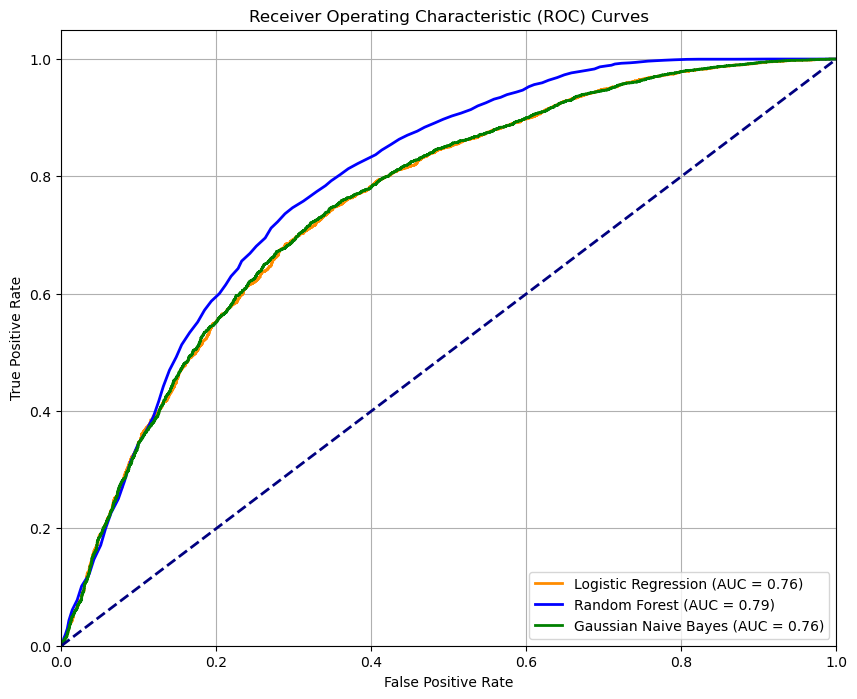

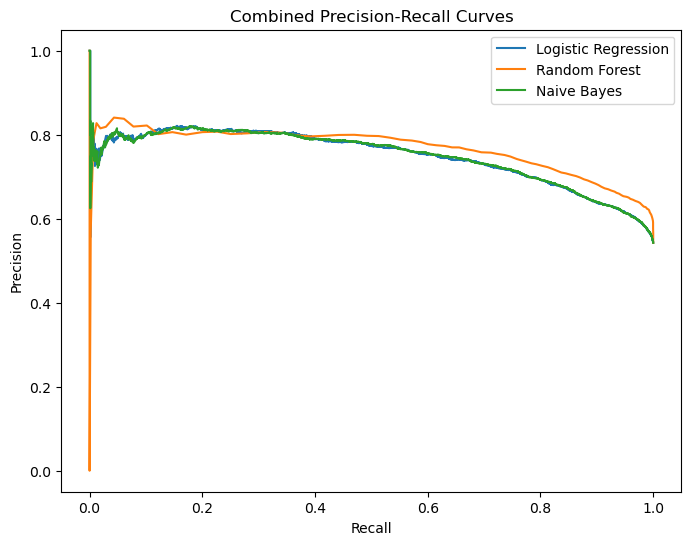

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Fit models with the best parameters from GridSearchCV
log_reg_best = LogisticRegression(max_iter=1000, random_state=42)
log_reg_best.fit(X_train, y_train)

rf_clf_best = RandomForestClassifier(random_state=42)
rf_clf_best.fit(X_train, y_train)

nb_clf_best = GaussianNB()
nb_clf_best.fit(X_train, y_train)

# Prediction probabilities for ROC curve
y_prob_log = log_reg_best.predict_proba(X_test)[:, 1]
y_prob_rf = rf_clf_best.predict_proba(X_test)[:, 1]
y_prob_gnb = nb_clf_best.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for each model
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_prob_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

# Plot ROC curves for all three models
plt.figure(figsize=(10, 8))
plt.plot(fpr_log, tpr_log, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_gnb, tpr_gnb, color='green', lw=2, label=f'Gaussian Naive Bayes (AUC = {roc_auc_gnb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random guessing line

# Label the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
    
for model_name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(recall, precision, label=f"{model_name}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Combined Precision-Recall Curves")
plt.legend(loc="upper right")
plt.show()

### XG boost

Best Parameters for XGBoost: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}
XGBoost Training Precision: 0.7616885127464135
XGBoost Training Accuracy: 0.7620862110026196
Training Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.70      0.73      7729
           1       0.76      0.81      0.79      9067

    accuracy                           0.76     16796
   macro avg       0.76      0.76      0.76     16796
weighted avg       0.76      0.76      0.76     16796

XGBoost Testing Precision: 0.7356650011896264
XGBoost Testing Accuracy: 0.7326017502430893
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.66      0.69      3293
           1       0.74      0.79      0.76      3906

    accuracy                           0.73      7199
   macro avg       0.73      0.73      0.73      7199
weighted avg       0.

c:\Users\Chris\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [00:33:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


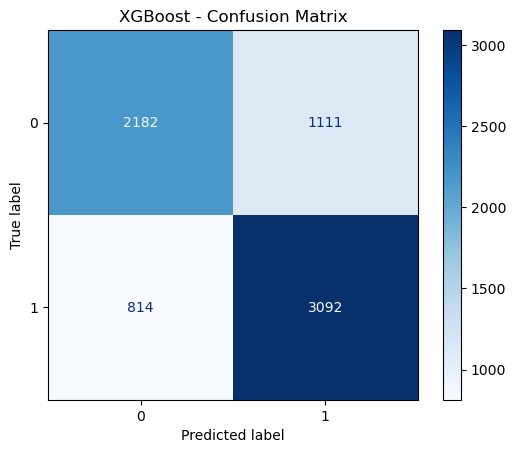

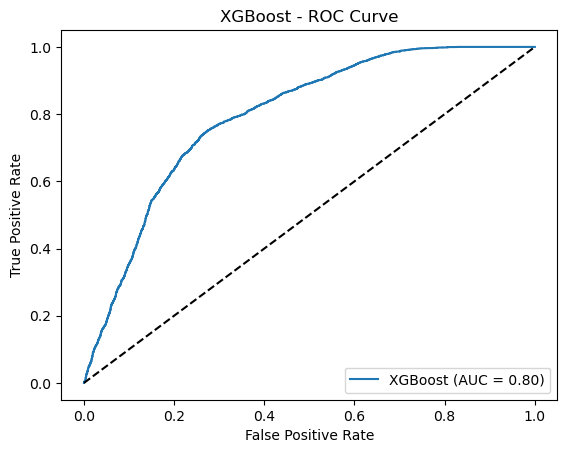

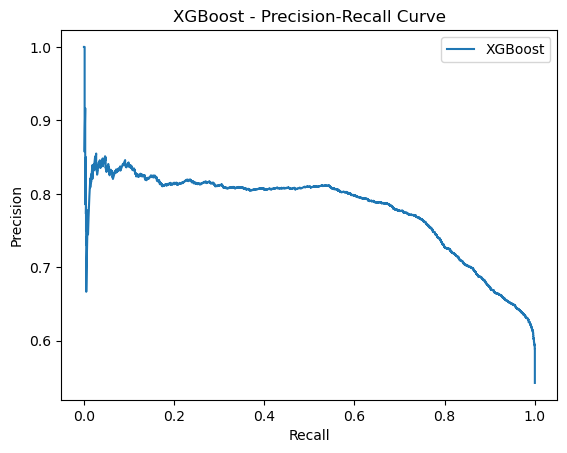

In [27]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Define the features and target
X = df[['Soil Moisture', 'Temperature', 'Soil Humidity', 'Air humidity (%)', 'Wind gust (Km/h)']]
y = df['Status'].map({'OFF': 0, 'ON': 1})

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the XGBoost model and parameter grid for tuning
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='precision', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

# Best parameters for XGBoost
print("Best Parameters for XGBoost:", grid_xgb.best_params_)
best_xgb = grid_xgb.best_estimator_

# Training and testing predictions
y_train_pred_xgb = best_xgb.predict(X_train)
y_test_pred_xgb = best_xgb.predict(X_test)

# Training and testing performance metrics
precision_train_xgb = precision_score(y_train, y_train_pred_xgb)
accuracy_train_xgb = accuracy_score(y_train, y_train_pred_xgb)
precision_test_xgb = precision_score(y_test, y_test_pred_xgb)
accuracy_test_xgb = accuracy_score(y_test, y_test_pred_xgb)

print("XGBoost Training Precision:", precision_train_xgb)
print("XGBoost Training Accuracy:", accuracy_train_xgb)
print("Training Classification Report:\n", classification_report(y_train, y_train_pred_xgb))

print("XGBoost Testing Precision:", precision_test_xgb)
print("XGBoost Testing Accuracy:", accuracy_test_xgb)
print("Testing Classification Report:\n", classification_report(y_test, y_test_pred_xgb))

# Visualization Functions
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

def plot_roc_curve(model, X_test, y_test, model_name):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{model_name} - ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

def plot_precision_recall_curve(model, X_test, y_test, model_name):
    y_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(recall, precision, label=f"{model_name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{model_name} - Precision-Recall Curve")
    plt.legend(loc="upper right")
    plt.show()

# Plotting for XGBoost
plot_confusion_matrix(best_xgb, X_test, y_test, "XGBoost")
plot_roc_curve(best_xgb, X_test, y_test, "XGBoost")
plot_precision_recall_curve(best_xgb, X_test, y_test, "XGBoost")
